##### MEDICAL INSURANCE PROJECT
### AUTHOR : Masinde Victor Kiprono

### BUSINESS UNDERSTANDING
## Project Overview
One of the basic needs of a human being is access to emdical care. Everyday we have people dying to the inability to access affordable medical attention. Insurance is key in ensuring that everybody is cattered for healthwise. In this project we are going to explore the factore that affect the insurance fees for different patients. lets dive straight into it


In [4]:
# Import the necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data Understanding
For this project, we are using data sourced from kaggle. The data was initially stored in CSV format. Here we import our data to the notebook and explore it further. The data has seven columns namely `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges`.Among these columns, four are made of numeric entries while three columns are in text form. The data has 1338 rows. We can also see from the statisticcal summary that the highest BMI is 53 while the lowest is 15.96. The oldest person is of 64 years while the youngest is 18 years old. These give us a glimples of our data before we start the real analysis.

In [5]:
# import the data and read it to notebook
df=pd.read_csv("Health_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Check for the shape of the data
df.shape

(1338, 7)

In [7]:
#check for the detailed summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Check for the statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning
We need to clean data before analysing it to avoid errors. We check for missing values, duplicates and any other issues that could lead us to wrong conlusions in our analysis. The data had 1 duplicated entry which we deleted. We found no missing values in the data. While checking for outliers, large charges appeared on a right skew. After applying log function which shrinks large values and spreads the small values, we have a better intrepretation. We can therefore proceed to further EDA

In [9]:
# Check for duplicates
#df.duplicated()
duplicates = df[df.duplicated()]
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
#Drop the duplicated row and check again 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

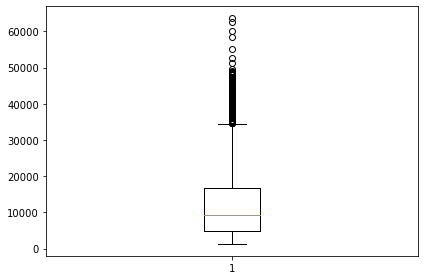

In [12]:
plt.boxplot(df['charges'])
plt.tight_layout()
plt.show()

In [13]:
# Log charges column
df['log_charges'] = np.log(df['charges'] + 1)


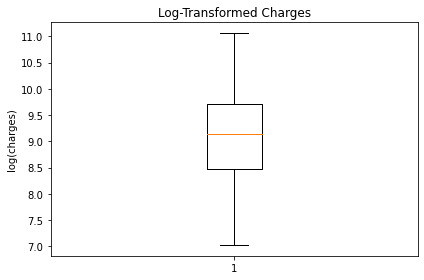

In [14]:
# Plot the graph for logged charges
plt.boxplot(df['log_charges'])
plt.title('Log-Transformed Charges')
plt.ylabel('log(charges)')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis
In this section we are going to explore our data using visualizations. We can get a clear image of our data using different graphs and then decide from there the suitable model to use.

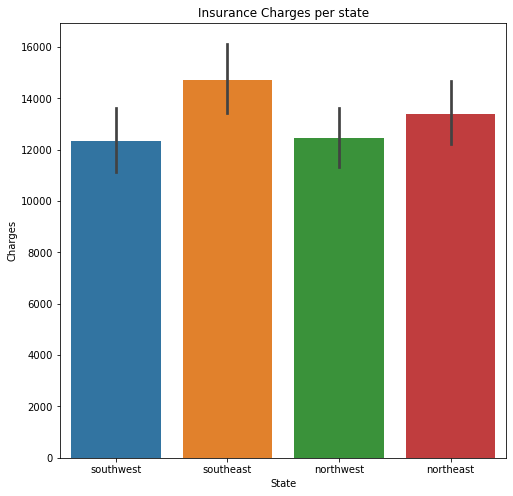

In [32]:
# Plot the bar graph showing age
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='region', y='charges')
plt.title("Insurance Charges per state")
plt.xlabel("State")
plt.ylabel("Charges");

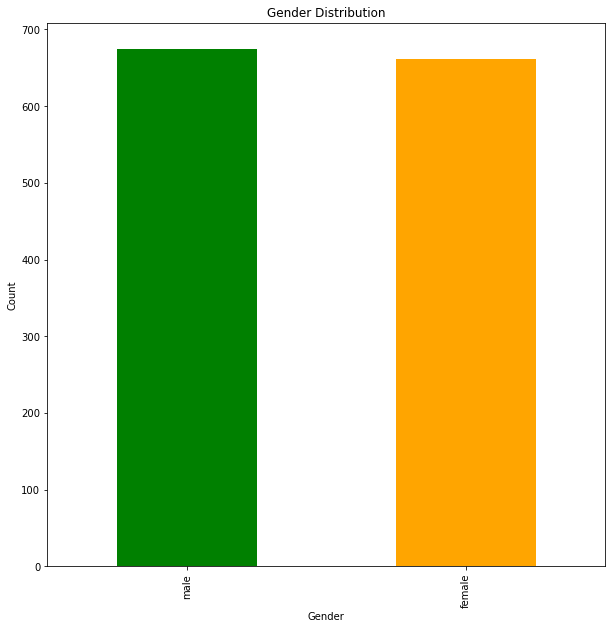

In [31]:
#Check the distribution of males to females
colors = ['green', 'orange']
plt.figure(figsize=(10,10))
df['sex'].value_counts().plot(kind='bar', color=colors)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count");

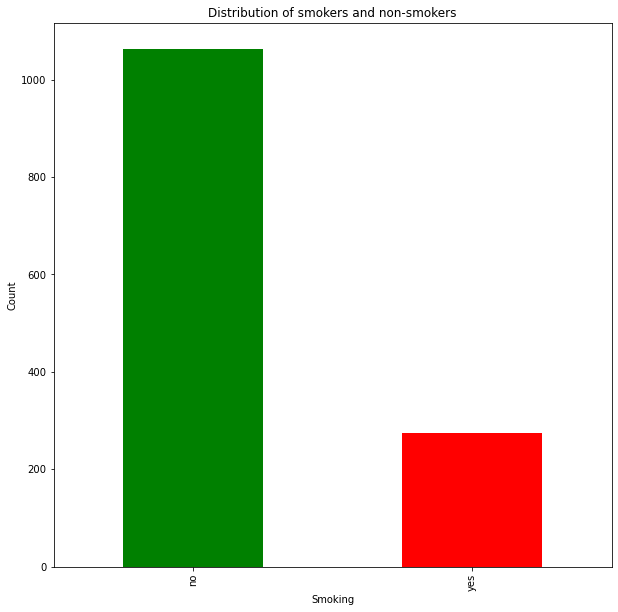

In [37]:
# Distribution of smokers
colors = ['green', 'red']
plt.figure(figsize=(10,10))
df['smoker'].value_counts().plot(kind='bar', color=colors)
plt.title("Distribution of smokers and non-smokers")
plt.xlabel("Smoking")
plt.ylabel("Count");

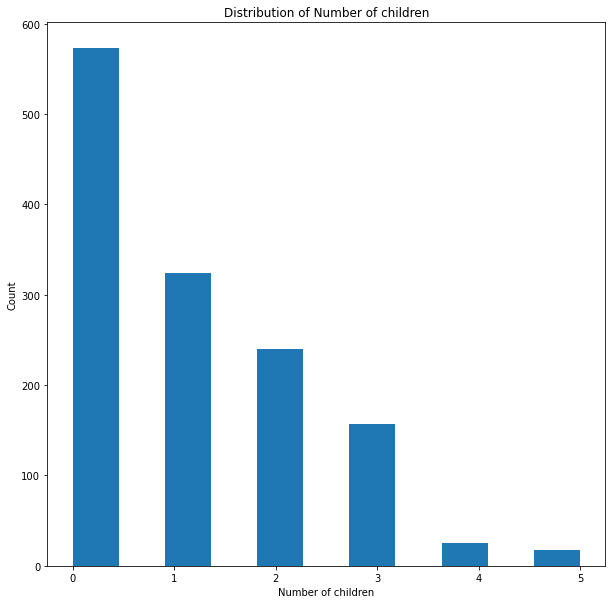

In [ ]:
#Distribution of Number of children
colors = ['green', 'red']
plt.figure(figsize=(10,10))
plt.hist(df['children'],bins =11)
plt.title("Distribution of Number of children")
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.tight_layout;

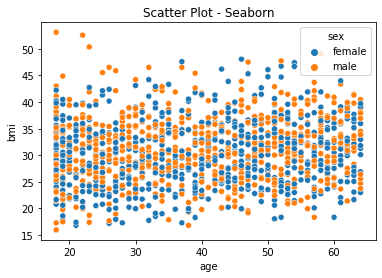

In [57]:
#Correlation between age and BMI
sns.scatterplot(data=df, x='age', y='bmi', hue='sex')
plt.title('Scatter Plot - Seaborn')
plt.show()



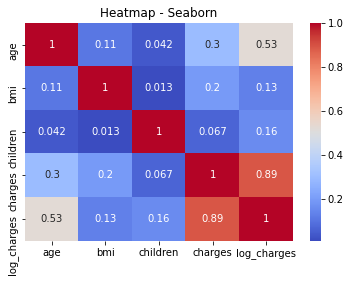

In [ ]:
#Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap - Seaborn')
plt.show()
